In [1]:
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
cmap='Blues'

Confusion Matrices best lyric


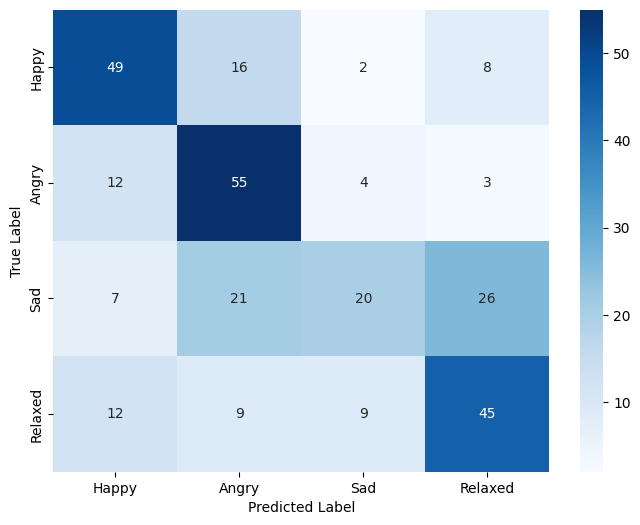

Confusion Matrices best audio


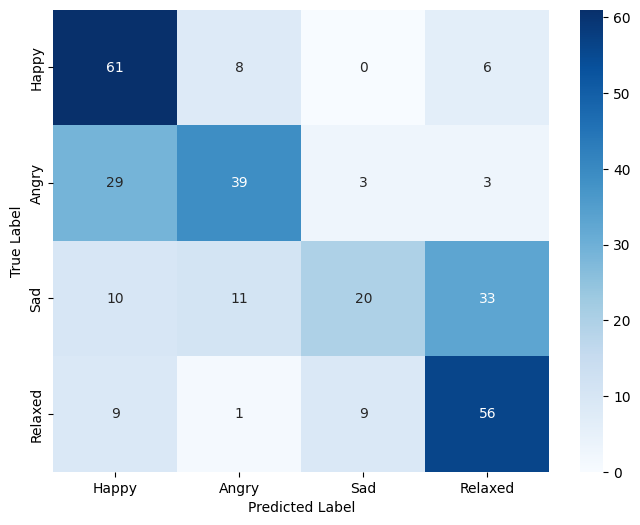

Confusion Matrices best majority voting


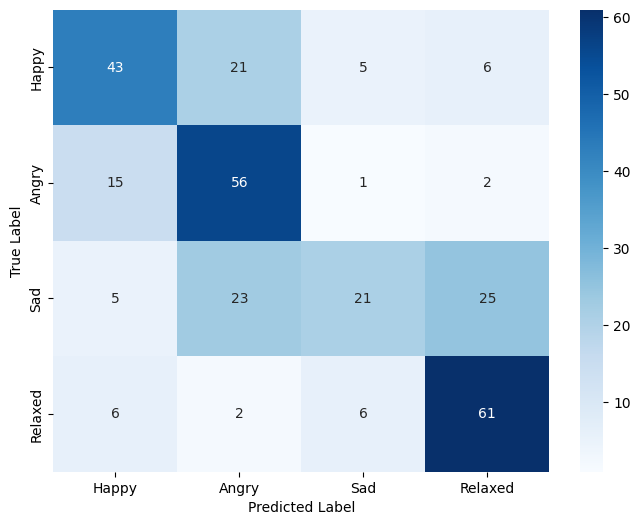

Confusion Matrices best concatenation ensemble


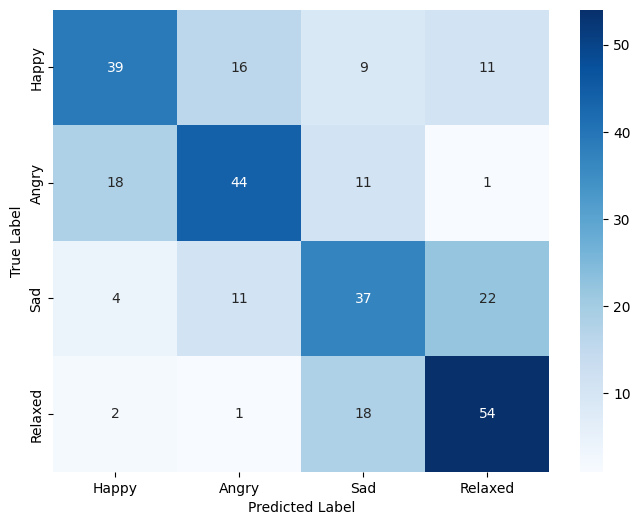

In [48]:
# Example data for confusion matrices
# Replace these matrices with your actual data
conf_matrix_lyric = np.array([
    [49, 16, 2, 8],
    [12, 55, 4, 3],
    [7, 21, 20, 26],
    [12, 9, 9, 45]
])

conf_matrix_audio = np.array([
    [61, 8, 0, 6],
    [29, 39, 3, 3],
    [10, 11, 20, 33],
    [9, 1, 9, 56]
])

#majority voting
conf_matrix_concat = np.array([
        [43, 21,  5,  6],
        [15, 56,  1,  2],
        [ 5, 23, 21, 25],
        [ 6,  2,  6, 61]
])

#cconcatenation ensemble
conf_matrix_concat_ensemble = np.array([
        [39, 16,  9,  11],
        [18, 44,  11,  1],
        [ 4, 11, 37, 22],
        [ 2,  1,  18, 54]
])

target_names = ['Happy', 'Angry', 'Sad', 'Relaxed']
cmap = "Blues"  # Color map

def plot_confusion_matrix(cm, title, target_names, cmap):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, 
                annot=True,
                cbar=True, 
                fmt='d', 
                cmap=cmap, 
                xticklabels=target_names, 
                yticklabels=target_names)
    # plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot each confusion matrix
print("Confusion Matrices best lyric")
plot_confusion_matrix(conf_matrix_lyric, "Confusion Matrix for Lyric Model", target_names, cmap)
print("Confusion Matrices best audio")
plot_confusion_matrix(conf_matrix_audio, "Confusion Matrix for Audio Model", target_names, cmap)
print("Confusion Matrices best majority voting")
plot_confusion_matrix(conf_matrix_concat, "Confusion Matrix for Majority voting", target_names, cmap)
print("Confusion Matrices best concatenation ensemble")
plot_confusion_matrix(conf_matrix_concat_ensemble, "Confusion Matrix for Concatenation Ensemble", target_names, cmap)


Precision_across_models


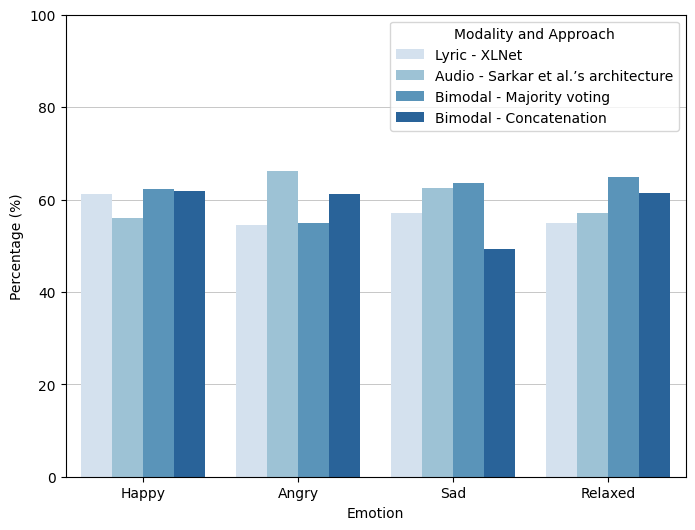

Recall_across_models


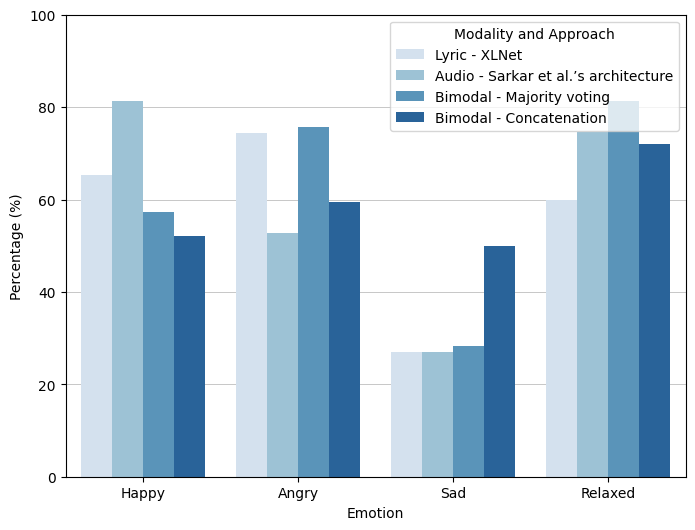

F1_score_scross_models


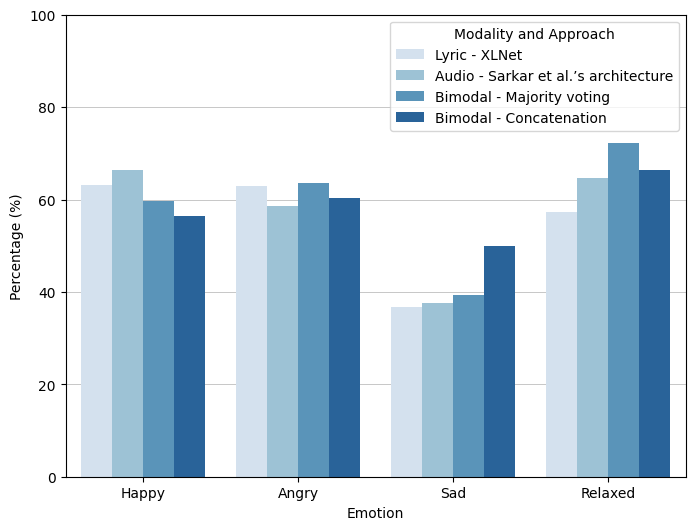

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combined data for all models
combined_data = {
    "Modality and approach": ["Lyric - XLNet"] * 4 + ["Audio - Sarkar et al.’s architecture"] * 4 + ["Bimodal - Majority voting"] * 4 + ["Bimodal - Concatenation"] * 4,
    "Emotion": ["Happy", "Angry", "Sad", "Relaxed"] * 4,
    "Precision": [
        61.3, 54.5, 57.1, 54.9,  # Lyric
        56.0, 66.1, 62.5, 57.1,  # Audio
        62.3, 54.9, 63.6, 64.9,  # Majority voting
        61.9, 61.1, 49.3, 61.4,  # Concatenation
    ],
    "Recall": [
        65.3, 74.3, 27.0, 60.0,  # Lyric
        81.3, 52.7, 27.0, 74.7,  # Audio
        57.3, 75.7, 28.4, 81.3,  # Majority voting
        52.0, 59.5, 50.0, 72.0,  # Concatenation
    ],
    "F1 Score": [
        63.2, 62.9, 36.7, 57.3,  # Lyric
        66.3, 58.7, 37.7, 64.7,  # Audio
        59.7, 63.6, 39.3, 72.2,  # Majority voting
        56.5, 60.3, 50.0, 66.3,  # Concatenation
    ],
}

# Convert combined data to DataFrame
combined_df = pd.DataFrame(combined_data)

def plot_metric(dataframe, metric, title, palette="Blues", figsize=(8, 6)):
    """
    Function to plot a specific metric across models with gridlines below the bars.

    Args:
        dataframe (pd.DataFrame): DataFrame containing data to plot.
        metric (str): Metric to plot (e.g., 'Precision', 'Recall', 'F1 Score').
        title (str): Title of the plot.
        palette (str): Color palette for the plot.
        figsize (tuple): Size of the figure.
    """
    plt.figure(figsize=figsize)
    melted_df = dataframe.melt(id_vars=["Modality and approach", "Emotion"], value_vars=[metric], var_name="Metric", value_name="Value")
    ax = sns.barplot(data=melted_df, x="Emotion", y="Value", hue="Modality and approach", palette=palette)
    ax.set_axisbelow(True)  # Ensure gridlines are below bars
    plt.grid(axis="y", linestyle="-", linewidth=0.5)
    # plt.title(title)
    plt.ylabel("Percentage (%)")
    plt.ylim(0, 100)
    plt.legend(title="Modality and Approach")
    plt.show()

# Plot each metric using the function
print("Precision_across_models")
plot_metric(combined_df, "Precision", "Precision Across Models")
print("Recall_across_models")
plot_metric(combined_df, "Recall", "Recall Across Models")
print("F1_score_scross_models")
plot_metric(combined_df, "F1 Score", "F1 Score Across Models")


Weighted Averages Across Models


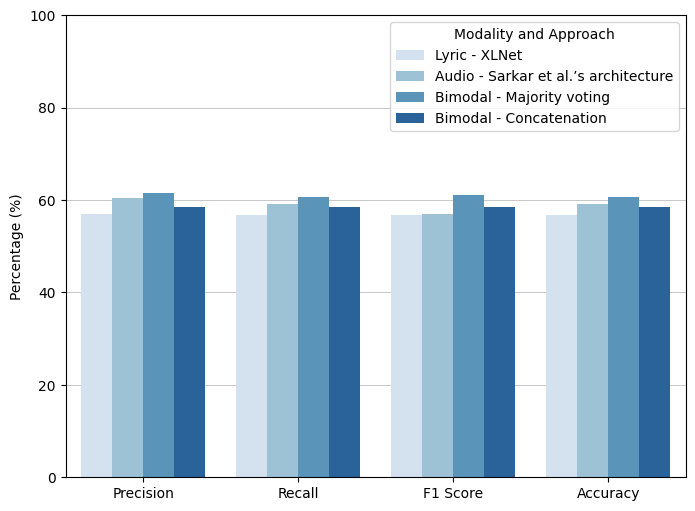

In [47]:
# Data for Macro average and Weighted average across models
average_data = {
    "Model": ["Lyric - XLNet", "Audio - Sarkar et al.’s architecture", "Bimodal - Majority voting", "Bimodal - Concatenation"],
    "Precision": [56.9, 60.4, 61.5, 58.5],
    "Recall": [56.7, 59.1, 60.7, 58.4],
    "F1 Score": [56.8, 56.9, 61.1, 58.4],
    "Accuracy": [56.7, 59.1, 60.7, 58.4],
}

# Convert dictionary to DataFrame
average_df = pd.DataFrame(average_data)

def plot_averages(dataframe, metrics, title, palette="Blues", figsize=(8, 6)):
    """
    Function to plot averages (Macro or Weighted) across models with gridlines below the bars.

    Args:
        dataframe (pd.DataFrame): DataFrame containing data to plot.
        metrics (list): List of metrics to plot (e.g., ['Macro Precision', 'Macro Recall', 'Macro F1 Score']).
        title (str): Title of the plot.
        palette (str): Color palette for the plot.
        figsize (tuple): Size of the figure.
    """
    plt.figure(figsize=figsize)
    melted_df = dataframe.melt(id_vars=["Model"], value_vars=metrics, var_name="Metric", value_name="Value")
    ax = sns.barplot(data=melted_df, x="Metric", y="Value", hue="Model", palette=palette)
    ax.set_axisbelow(True)  # Ensure gridlines are below bars
    plt.grid(axis="y", linestyle="-", linewidth=0.5)
    # plt.title(title)
    plt.ylabel("Percentage (%)")
    # plt.xlabel("Weighted Averages")
    plt.xlabel("")
    plt.ylim(0, 100)
    # plt.xticks(rotation=45)
    plt.legend(title="Modality and Approach")
    plt.show()

# Plot Weighted averages
print("Weighted Averages Across Models")
plot_averages(average_df, ["Precision", "Recall", "F1 Score", "Accuracy"], "Weighted Averages Across Models")
